<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW08 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due 4/11/25 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Victor Allen 

## Your ID: 132107570

## 1. Summary

1) Found the deriviatives of the assigned functions using sympy
2) Found the integrals of the assigned functions using sympy
3) Found a problem in a textbook that could not be solved using symbolic computing. 
4) Used symbolic computing to solve backpropogation. 
5) Used symbolic computing do compute the assigned functions. 

## 2. Methodology

For parts 1 and 2, I defined the function in a variable f, then in another variable fPrime or F, i took the integral or deriviative and printed the result. 

For part 3, I found a difficult integral that has no elementary anti-deriviative, meaning that you would not be able to solve it using sumbolic computing and would have to resort to numeric methods. 

For part 4, I just defined the variables and called the diff function to find the deriviative. 

For part 5, I wrote a sigmoid function, then defined U and V and then computed the assigned problems using sumbolic computing and printed the results. After that I created a plot to plot the solution for eq,1 the differenced between eq 1 and 2, their growth rates, and their errors growth rates. 

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Question 1

In [11]:
import sympy as sp

In [12]:
sp.init_printing()

x ,a, b = sp.symbols('x a b', real = True)

t, u0, epsilon, sigma = sp.symbols('t u0 epsilon sigma', real = True)


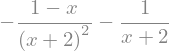

In [13]:
f = (1 - x) / (2 + x)

fPrime = sp.diff(f,x)

fPrime

In [14]:
f = a * x

fPrime = sp.diff(f,x)

fPrime

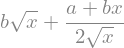

In [15]:
f = sp.sqrt(x) * (a + b*x)

fPrime = sp.diff(f,x)

fPrime

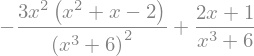

In [16]:
f = (x**2 + x - 2) / (x**3 + 6)

fPrime = sp.diff(f,x)

fPrime

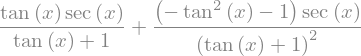

In [17]:
f = sp.sec(x) / ( 1 + sp.tan(x))

fPrime = sp.diff(f,x)

fPrime

In [18]:
f = sp.sin(x**2)

fPrime = sp.diff(f,x)

fPrime

In [19]:
f = (sp.sin(x))**2

fPrime = sp.diff(f,x)

fPrime

In [20]:
f = sp.exp(sp.sin(x))

fPrime = sp.diff(f,x)

fPrime

In [21]:
f = sp.sin(sp.cos(sp.tan(x)))

fPrime = sp.diff(f,x)

fPrime

### Question 2

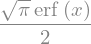

In [22]:
f = sp.exp(-x**2)

F = sp.integrate(f,x)

F

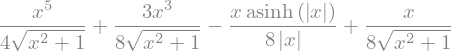

In [23]:
f = sp.sqrt(1 + (x**2)) * x**2 

F = sp.integrate(f,x)

F

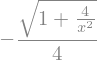

In [24]:
f = 1 / (x**2 * sp.sqrt((x**2) + 4))

F = sp.integrate(f,x)

F

In [25]:
f = x / sp.sqrt(x**2 + 4)

F = sp.integrate(f,x)

F

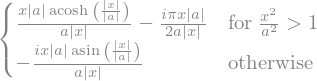

In [26]:
f = 1 / sp.sqrt(x**2 - a**2)

F = sp.integrate(f,x)

F

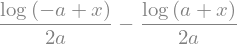

In [27]:
f = 1 / (x**2 - a**2)

F = sp.integrate(f,x)

F

In [28]:
f = sp.exp(sp.sqrt(x))

F = sp.integrate(f,x)

F

In [29]:
f = x**3 * sp.sin(x)

F = sp.integrate(f,x)

F

### Question 3

From the MATH150 Textbook Calculus Early Transcendentals 9th Edition the integral: $$ \int e^{x^2} \, dx $$ cannot be solved with symbolic computing, because it has no elementary anti - deriviative. To evaluate the integral you would have to solve it numberically, or use a power series. 


### Question 4

In [54]:
import sympy as sp

u, v = sp.symbols('u v')
w1, w2, w3 = sp.symbols('w1 w2 w3')
b1, b2 = sp.symbols('b1 b2')
q = sp.symbols('q')

x = w1 * u + w2 * v + b1
a = x 
z = (w3 * a) + b2
q_hat = z 

L = 0.5 * (q - q_hat)**2

dL_dw1 = sp.diff(L, w1)
dL_dw1_simplified = sp.simplify(dL_dw1)

dL_dw1_simplified


I got the same thing with a manual derivation. What I found weird though, is that if you try to explicity use the chain rule, symbolic computing doesn't work, you would have to individualy define each variable, which I did also and got the same answer. but if you just take the derivative, the chain rule is invoked internally and it works. 

### Question 5

In [31]:
import sympy as sp

sp.init_printing()
t , dt,sigma,u0,v0,eps = sp.symbols('t dt sigma u0 v0 eps', real = True, positive = True)

U = (u0 * sp.exp(sigma * t)) / (1 - u0 + u0 * sp.exp(sigma * t))

V = (v0 * sp.exp(sigma * t)) / (1 - v0 + v0 * sp.exp(sigma * t))

U_dt = U.subs(t, t + dt)

a1 = (sp.log(U_dt / U) / dt).simplify()

a2 = (sigma * (1 - U)).simplify()

U_next = U.subs(t,t+dt)

V_next = V.subs(t,t+dt)

b1 = (sp.log((U_next - V_next) / (U - V)) / dt).simplify()

b2 = (sigma * (1 - 2 * U)).simplify()


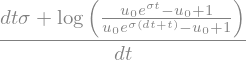

In [32]:
a1

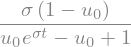

In [33]:
a2

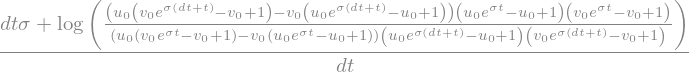

In [34]:
b1

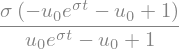

In [35]:
b2

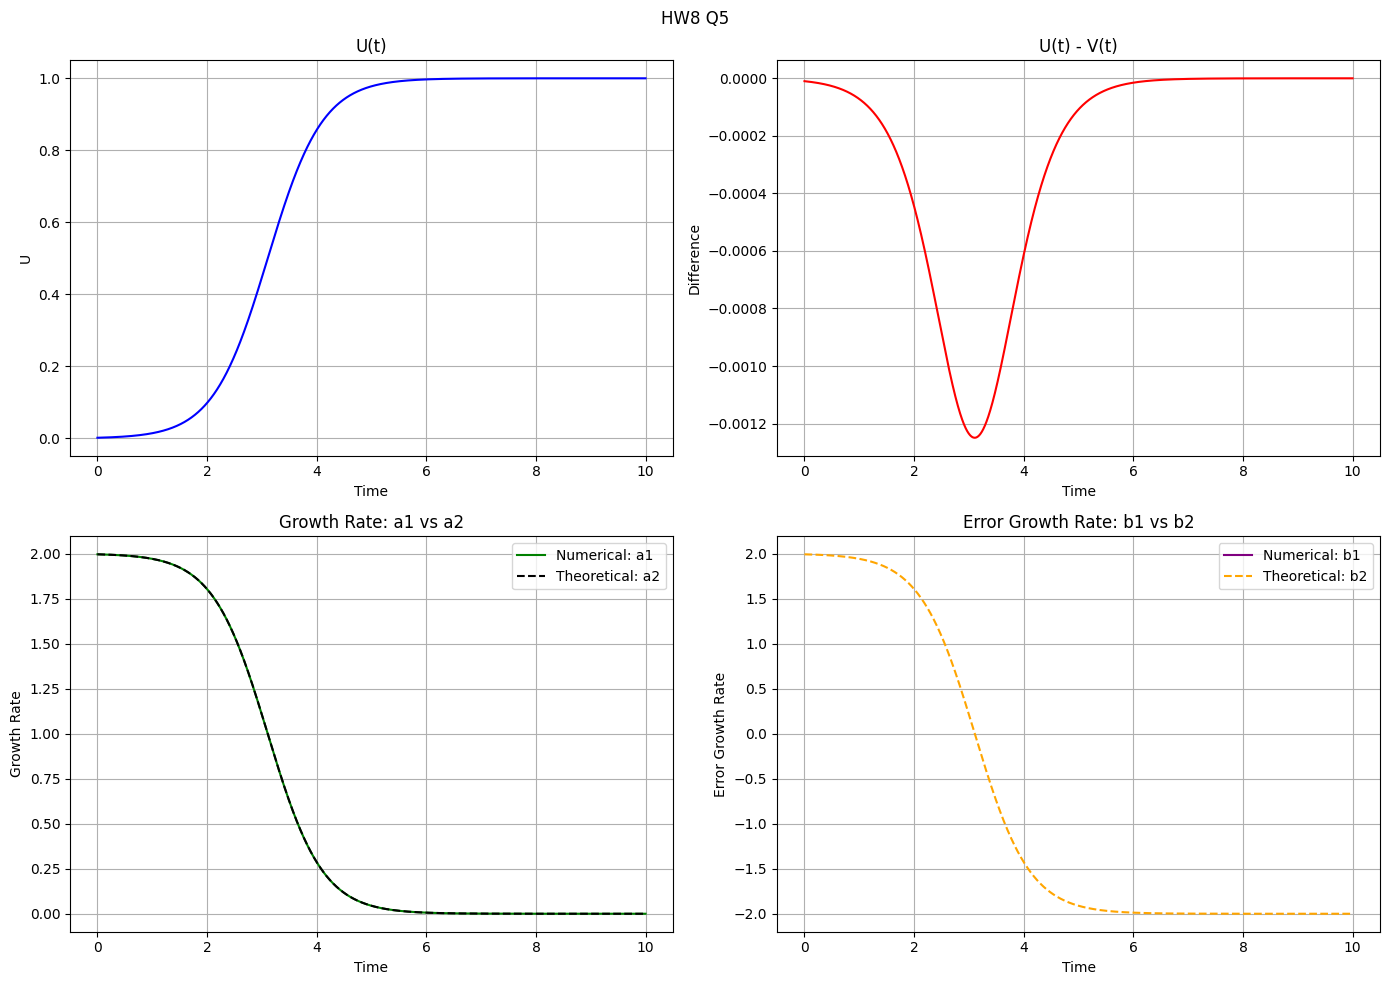

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 2
u0 = 0.002
eps = 1e-5
v0 = u0 + eps
dt = 0.001
t_values = np.arange(0, 10, dt)

def sigmoid(u0, t, sigma=2):
    exp_term = np.exp(sigma * t)
    return (u0 * exp_term) / (1 - u0 + u0 * exp_term)

U_vals = sigmoid(u0, t_values, sigma)
V_vals = sigmoid(v0, t_values, sigma)

U_next = np.roll(U_vals, -1)
U_next[-1] = U_vals[-1]
a1_vals = np.log(U_next / U_vals) / dt

a2_vals = sigma * (1 - U_vals)

V_next = np.roll(V_vals, -1)
V_next[-1] = V_vals[-1]

diff = U_vals - V_vals
diff_next = U_next - V_next
valid = (diff != 0) & (diff_next > 0) & (diff > 0)
b1_vals = np.full_like(diff, np.nan)
b1_vals[valid] = np.log(diff_next[valid] / diff[valid]) / dt

b2_vals = sigma * (1 - 2 * U_vals)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("HW8 Q5")

axs[0, 0].plot(t_values, U_vals, label="U(t)", color='blue')
axs[0, 0].set_title("U(t)")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("U")
axs[0, 0].grid(True)

axs[0, 1].plot(t_values, U_vals - V_vals, label="U - V", color='red')
axs[0, 1].set_title("U(t) - V(t)")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Difference")
axs[0, 1].grid(True)

axs[1, 0].plot(t_values, a1_vals, label="Numerical: a1", color='green')
axs[1, 0].plot(t_values, a2_vals, label="Theoretical: a2", linestyle='--', color='black')
axs[1, 0].set_title("Growth Rate: a1 vs a2")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Growth Rate")
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(t_values, b1_vals, label="Numerical: b1", color='purple')
axs[1, 1].plot(t_values, b2_vals, label="Theoretical: b2", linestyle='--', color='orange')
axs[1, 1].set_title("Error Growth Rate: b1 vs b2")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Error Growth Rate")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
